In [ ]:
# Determinar las matrices de varianza-covarianza y correlación para el 
# conjunto de datos completo, analizar las correlaciones existente entre las variables.

In [2]:
import pandas as pd

import sys
import os
from sklearn.preprocessing import StandardScaler

current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)
src_dir = os.path.join(parent_dir, 'src')
sys.path.insert(0, src_dir)

from analysis.correlations import CorrelationAnalysisUtils



In [3]:
covariances_utils = CorrelationAnalysisUtils()

In [4]:
data_frame = pd.read_csv('../assets/HFCO2_cleaned_and_imputed.csv')

In [5]:
data_frame

,co2_eq_emissions,downloads,likes,size,size_efficency
0,149200.000000,1172830,170,3.528337e+08,2.364837e+03
1,133.021988,14,0,3.081921e+08,2.316851e+06
2,126.344463,14,1,3.083194e+08,2.440308e+06
3,7.989145,45,0,4.380438e+08,5.482988e+07
4,55.101963,43,0,4.333314e+08,7.864173e+06
...,...,...,...,...,...
1300,0.401257,0,0,1.336520e+09,3.330836e+09
1301,0.015786,0,0,3.100225e+08,1.963898e+10
1302,3.673900,0,0,3.100225e+08,8.438513e+07
1303,5.741513,0,0,3.100225e+08,5.399666e+07


In [6]:
# Estandarización de los datos
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_frame), columns=data_frame.columns)

In [8]:
df_scaled

,co2_eq_emissions,downloads,likes,size,size_efficency
0,0.189605,25.309022,1.899911,-0.098376,-0.266375
1,-0.028457,-0.048031,-0.037045,-0.102662,-0.266320
2,-0.028467,-0.048031,-0.025651,-0.102650,-0.266317
3,-0.028640,-0.047361,-0.037045,-0.090193,-0.265052
4,-0.028571,-0.047404,-0.037045,-0.090646,-0.266186
...,...,...,...,...,...
1300,-0.028651,-0.048334,-0.037045,-0.003917,-0.185993
1301,-0.028652,-0.048334,-0.037045,-0.102487,0.207569
1302,-0.028646,-0.048334,-0.037045,-0.102487,-0.264339
1303,-0.028643,-0.048334,-0.037045,-0.102487,-0.265072


In [9]:
correlation_matrix = covariances_utils.calculate_correlation_matrix(df_scaled)
correlation_matrix

,co2_eq_emissions,downloads,likes,size,size_efficency
co2_eq_emissions,1.000000,0.035503,0.993421,0.993772,-0.007632
downloads,0.035503,1.000000,0.102058,0.023528,-0.012449
likes,0.993421,0.102058,1.000000,0.986667,-0.009197
size,0.993772,0.023528,0.986667,1.000000,-0.003181
size_efficency,-0.007632,-0.012449,-0.009197,-0.003181,1.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
cov_matrix_scaled = correlation_matrix
corr_matrix = data_frame.corr()

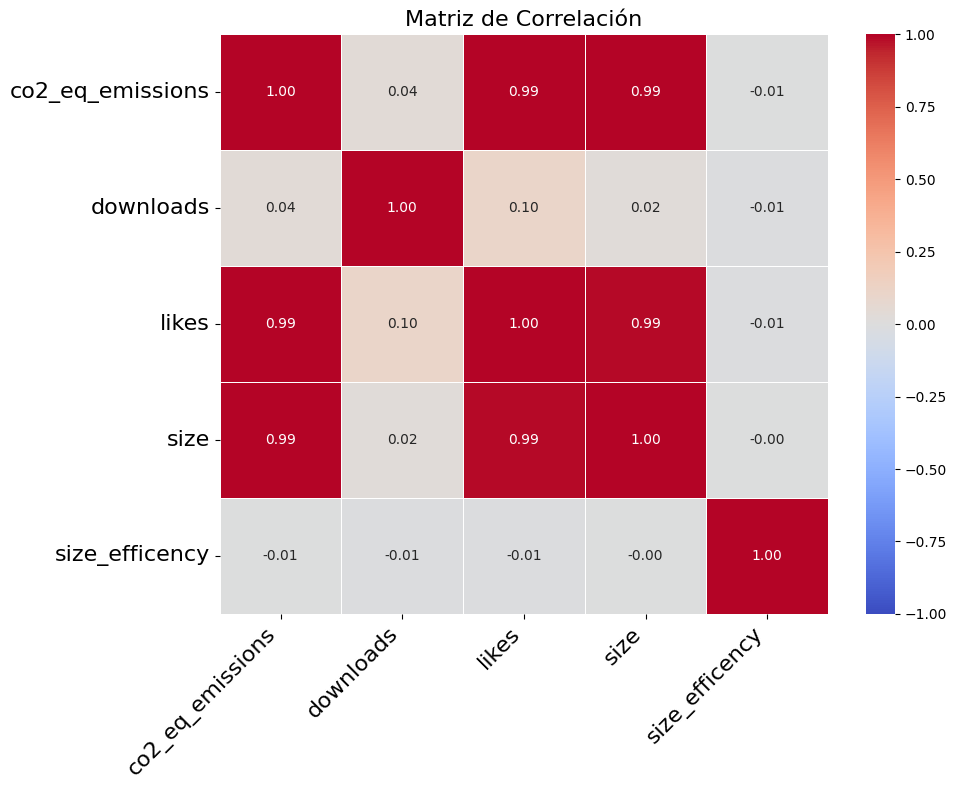

In [31]:
# Gráfico de la Matriz de Correlación
plt.figure(figsize=(10, 8)) # Ajusta el tamaño
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Matriz de Correlación", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.tight_layout()
plt.savefig("matriz_correlacion_ampliada.png")
plt.show() # Muestra la segunda gráfica

In [ ]:
# gráfica de una variable contra otra CO2 Likes y Size

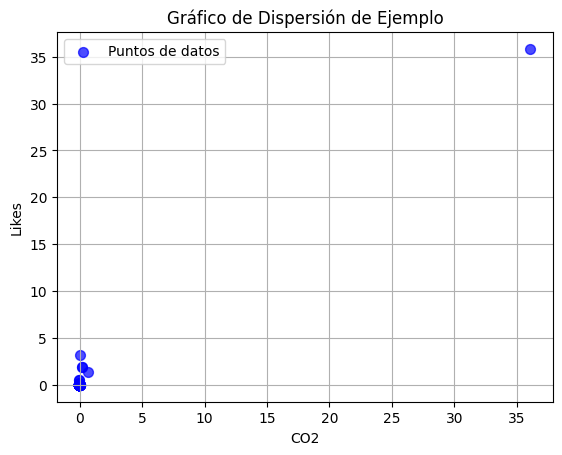

In [16]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)  # Para reproducibilidad
x =df_scaled['co2_eq_emissions']
y = df_scaled['likes']

plt.scatter(x, y, s=50, c='blue', alpha=0.7, label='Puntos de datos')

plt.title('Gráfico de Dispersión de Ejemplo')
plt.xlabel('CO2')
plt.ylabel('Likes')

plt.legend()

plt.grid(True)

plt.savefig('grafico_dispersion_ejemplo.png')

plt.show()

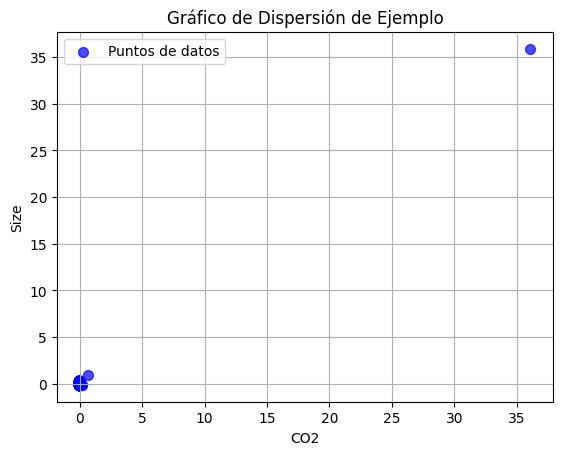

In [17]:
np.random.seed(0)  # Para reproducibilidad
x =df_scaled['co2_eq_emissions']
y = df_scaled['size']

plt.scatter(x, y, s=50, c='blue', alpha=0.7, label='Puntos de datos')

plt.title('Gráfico de Dispersión de Ejemplo')
plt.xlabel('CO2')
plt.ylabel('Size')

plt.legend()

plt.grid(True)

plt.savefig('grafico_dispersion_ejemplo.png')

plt.show()

/run/user/1000/app/com.jetbrains.PyCharm-Community/ipykernel_1286/2105325753.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quartile', y=column_name, data=dataframe, palette='viridis')


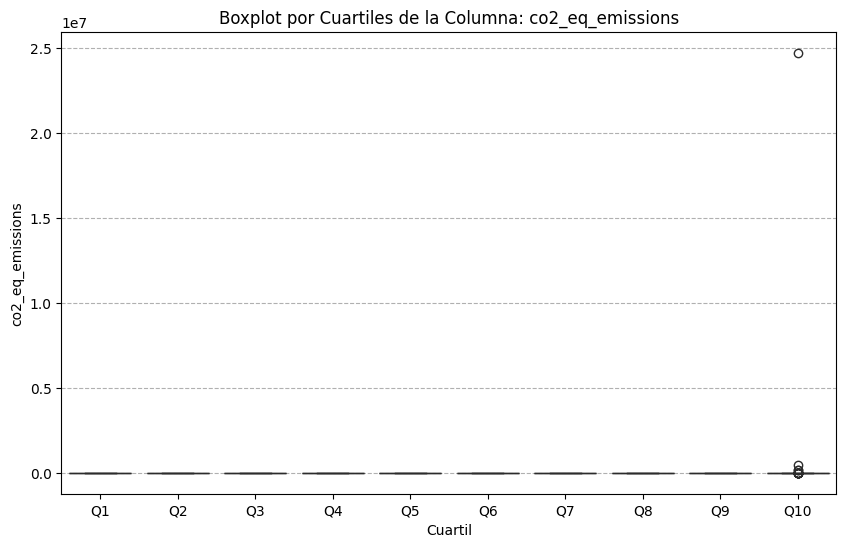

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def create_quartiles_and_boxplot(dataframe, column_name):
    """
    Divides a column into 4 quartiles and creates a boxplot.
    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to be analyzed.
    """
    # Create quartiles
    dataframe['quartile'] = pd.qcut(dataframe[column_name], 10, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'])
    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='quartile', y=column_name, data=dataframe, palette='viridis')
    plt.title(f'Boxplot por Cuartiles de la Columna: {column_name}')
    plt.xlabel('Cuartil')
    plt.ylabel(column_name)
    plt.grid(axis='y', linestyle='--')
    plt.savefig('quartile_boxplot.png')
    plt.show()
# Example usage with sample data
create_quartiles_and_boxplot(data_frame, 'co2_eq_emissions')

In [21]:
 quartiles = pd.qcut(data_frame['co2_eq_emissions'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [22]:
quartiles.value_counts()

co2_eq_emissions
Q1    327
Q2    326
Q3    326
Q4    326
Name: count, dtype: int64

/run/user/1000/app/com.jetbrains.PyCharm-Community/ipykernel_1463/3076889894.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['quartile'] = pd.qcut(dataframe[column_name], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
/run/user/1000/app/com.jetbrains.PyCharm-Community/ipykernel_1463/3076889894.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quartile', y=column_name, data=dataframe, palette='viridis')


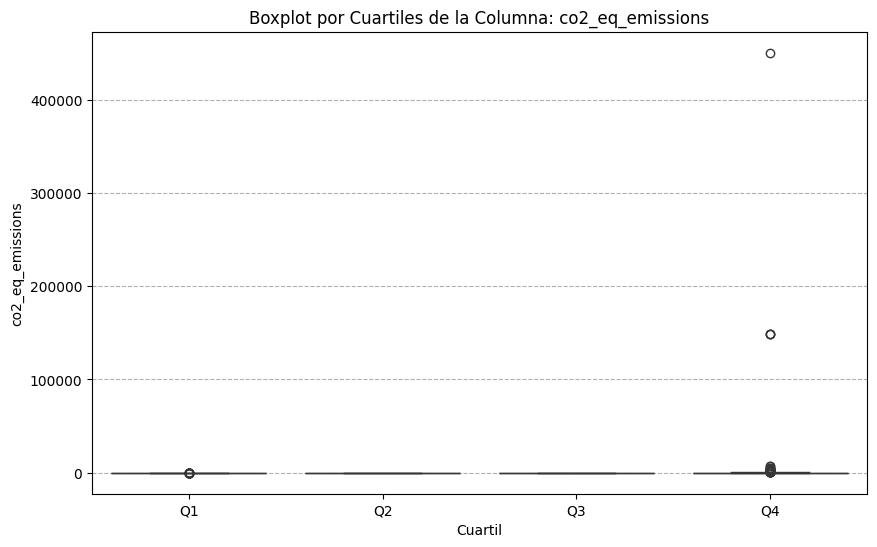

In [43]:
create_quartiles_and_boxplot(df4, 'co2_eq_emissions')

In [24]:
df_scaled.describe()

,co2_eq_emissions,downloads,likes,size,size_efficency
count,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03
mean,1.088954e-17,1.088954e-17,2.722386e-18,-1.361193e-18,-5.444772e-18
std,1.000383e+00,1.000383e+00,1.000383e+00,1.000383e+00,1.000383e+00
min,-2.865175e-02,-4.833398e-02,-3.704533e-02,-1.322353e-01,-2.663754e-01
25%,-2.865073e-02,-4.826912e-02,-3.704533e-02,-9.887694e-02,-2.654469e-01
50%,-2.864638e-02,-4.822588e-02,-3.704533e-02,-7.878528e-02,-2.618757e-01
75%,-2.862361e-02,-4.803129e-02,-3.704533e-02,-3.917981e-03,-2.489428e-01
max,3.610363e+01,2.530902e+01,3.583084e+01,3.587706e+01,1.364342e+01


/run/user/1000/app/com.jetbrains.PyCharm-Community/ipykernel_1286/2105325753.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quartile', y=column_name, data=dataframe, palette='viridis')


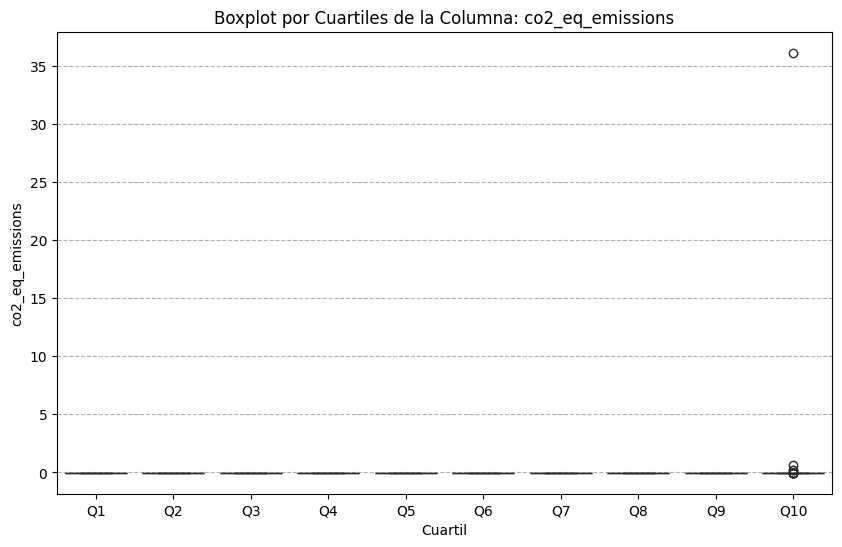

In [25]:
create_quartiles_and_boxplot(df_scaled, 'co2_eq_emissions')